# **Import potrzebnych bibliotek**

In [ ]:
import pandas as pd
import datetime
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
from typing import List
import seaborn as sns


# **`Wczytywanie danych`**

In [ ]:
ConfirmedCases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recoveries=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
PKB= pd.read_csv('https://raw.githubusercontent.com/WildWolf18/korona/master/hlth_sha11_hf_1_Data.csv')
testy= pd.read_csv('https://raw.githubusercontent.com/WildWolf18/korona/master/covid-19-tests-country.csv')

# Analiza danych

**1. Procent PKB przeznaczonego na służbe zdrowia, a ilość wyleczonych pacjentów w Europie. Dane na dzień 27.03.2020 (Procent PKB przekazany z 2016r.)**

In [ ]:
#wartoscPKB - tabela z wartością procentową PKB w Europie w 2016 roku 

In [ ]:
wartoscPKB=PKB.loc[PKB['UNIT']=='Percentage of gross domestic product (GDP)'][35:-34]

In [ ]:
#wyzdrowieli - liczba wyzdrowiałych pacjentów w wybranym dniu, z podziałem na kraje

In [ ]:
wyzdrowieli= Recoveries[['Country/Region', '3/27/20']].groupby(['Country/Region']).sum()

In [ ]:
#zdanie2 - tabela lacząca dane dotyczące PKB i wyzdrowiałych pacjentów, według krajów Europy

In [ ]:
zadanie2= wartoscPKB.merge(wyzdrowieli, left_on="GEO", right_on="Country/Region")

In [ ]:
zadanie2["Value"] = pd.to_numeric(zadanie2["Value"])



In [ ]:
wykresZadanie2= zadanie2.sort_values(by='Value')

In [ ]:
wykresZadanie2

,TIME,GEO,UNIT,ICHA11_HF,Value,Flag and Footnotes,3/27/20
21,2016,Romania,Percentage of gross domestic product (GDP),All financing schemes,4.99,NaN,115
14,2016,Luxembourg,Percentage of gross domestic product (GDP),All financing schemes,5.47,NaN,40
28,2016,Liechtenstein,Percentage of gross domestic product (GDP),All financing schemes,6.10,NaN,0
12,2016,Latvia,Percentage of gross domestic product (GDP),All financing schemes,6.21,NaN,1
4,2016,Estonia,Percentage of gross domestic product (GDP),All financing schemes,6.50,NaN,11
19,2016,Poland,Percentage of gross domestic product (GDP),All financing schemes,6.52,NaN,7
13,2016,Lithuania,Percentage of gross domestic product (GDP),All financing schemes,6.64,NaN,1
11,2016,Cyprus,Percentage of gross domestic product (GDP),All financing schemes,6.79,NaN,15
9,2016,Croatia,Percentage of gross domestic product (GDP),All financing schemes,6.83,NaN,37
23,2016,Slovakia,Percentage of gross domestic product (GDP),All financing schemes,6.98,NaN,2


Text(0.5, 1.0, 'Procent PKB przeznaczonego na służbe zdrowia, a ilość wyleczonych pacjentów w Europie.')

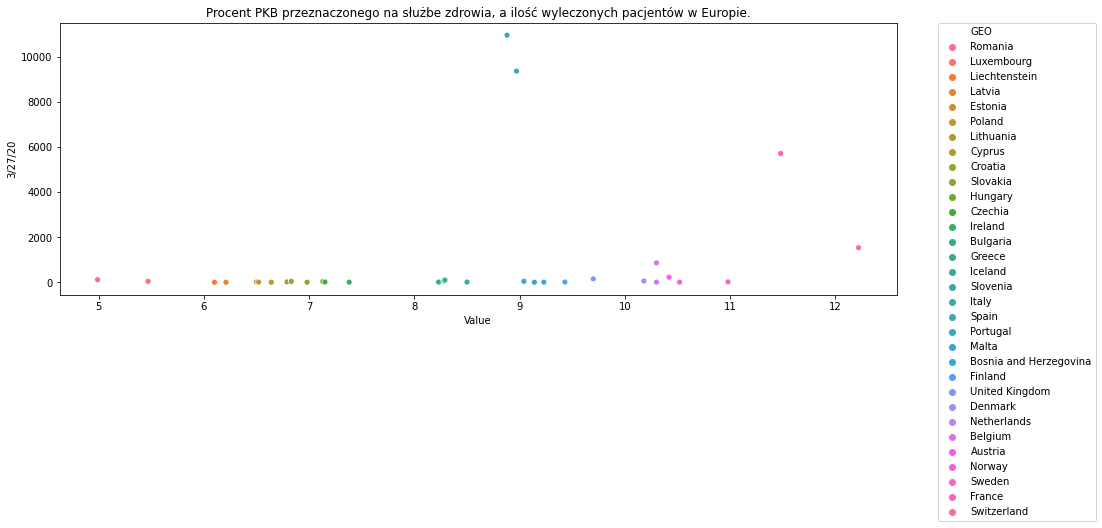

In [ ]:
sns.scatterplot(x= 'Value', y= '3/27/20', data=wykresZadanie2, hue="GEO", )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Procent PKB przeznaczonego na służbe zdrowia, a ilość wyleczonych pacjentów w Europie.')

**2. Stosunek wyzdrowień do zgonów, a %PKB danego kraju w Europie. Dane na dzień 27.03.2020 (Procent PKB przekazany w 2016r.) Wpływ %PKB na wyzdrowienia i zgony w danym kraju.  **

In [ ]:
# smierciZadanie3- zgony w danym dniu ze wzgledu na kraj
# wyzdrowialiZadanie3 - wyzdrowiali w danym dniu ze wzgledu na kraj

In [ ]:
smierciZadanie3= Deaths[['Country/Region', '3/27/20']].groupby(['Country/Region']).sum()
wyzdrowialiZadanie3= Recoveries[['Country/Region', '3/27/20']].groupby(['Country/Region']).sum()

In [ ]:
# smierciIWyzdrowienia - tabela laczaca powyzsze wartosci pod wzgledem kraju
# smiercZdrowi - tabela smierciIWyzdrowienia ze zmienionymi nazwami kolumn
# zadanie3 - tabela łącząca %PKB z powyższą tabelą

In [ ]:
smierciIWyzrowienia= smierciZadanie3.merge(wyzdrowialiZadanie3, left_on="Country/Region", right_on="Country/Region")

In [ ]:
smiercZdrowi= smierciIWyzrowienia.rename(columns={"3/27/20_x":"smierc", "3/27/20_y":"zdrowi"})

In [ ]:
zadanie3= wartoscPKB.merge(smiercZdrowi, left_on="GEO", right_on="Country/Region")

In [ ]:
zadanie3["Value"] = pd.to_numeric(zadanie3["Value"])

In [ ]:
zadanie3

,TIME,GEO,UNIT,ICHA11_HF,Value,Flag and Footnotes,smierc,zdrowi
0,2016,Belgium,Percentage of gross domestic product (GDP),All financing schemes,10.30,NaN,289,858
1,2016,Bulgaria,Percentage of gross domestic product (GDP),All financing schemes,8.23,NaN,3,9
2,2016,Czechia,Percentage of gross domestic product (GDP),All financing schemes,7.15,NaN,9,11
3,2016,Denmark,Percentage of gross domestic product (GDP),All financing schemes,10.18,NaN,52,57
4,2016,Estonia,Percentage of gross domestic product (GDP),All financing schemes,6.50,NaN,1,11
5,2016,Ireland,Percentage of gross domestic product (GDP),All financing schemes,7.38,NaN,22,5
6,2016,Greece,Percentage of gross domestic product (GDP),All financing schemes,8.28,NaN,28,52
7,2016,Spain,Percentage of gross domestic product (GDP),All financing schemes,8.97,NaN,5138,9357
8,2016,France,Percentage of gross domestic product (GDP),All financing schemes,11.48,NaN,1997,5707
9,2016,Croatia,Percentage of gross domestic product (GDP),All financing schemes,6.83,NaN,3,37


In [ ]:
# pętla zwracająca wartość pustej listy służącej do utworzenia nowej kolumny z stosunkiem wyzdrowiałych do zgonów w danym dniu ze względu na kraj

In [ ]:
j=0
a=0
pustaLista= []
for i in zadanie3['zdrowi']:
  a= i/zadanie3['smierc'][j]
  pustaLista.append(a)
  j=j+1
  print(pustaLista)

[2.9688581314878895]
[2.9688581314878895, 3.0]
[2.9688581314878895, 3.0, 1.2222222222222223]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727, 1.8571428571428572]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727, 1.8571428571428572, 1.8211366290385365]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727, 1.8571428571428572, 1.8211366290385365, 2.85778668002003]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727, 1.8571428571428572, 1.8211366290385365, 2.85778668002003, 12.333333333333334]
[2.9688581314878895, 3.0, 1.2222222222222223, 1.0961538461538463, 11.0, 0.22727272727272727, 1.8571428571428

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in long_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in long_scalars



In [ ]:
zadanie3['stosunekZ/S']= pustaLista

In [ ]:
zadanie3

,TIME,GEO,UNIT,ICHA11_HF,Value,Flag and Footnotes,smierc,zdrowi,stosunekZ/S
0,2016,Belgium,Percentage of gross domestic product (GDP),All financing schemes,10.30,NaN,289,858,2.968858
1,2016,Bulgaria,Percentage of gross domestic product (GDP),All financing schemes,8.23,NaN,3,9,3.000000
2,2016,Czechia,Percentage of gross domestic product (GDP),All financing schemes,7.15,NaN,9,11,1.222222
3,2016,Denmark,Percentage of gross domestic product (GDP),All financing schemes,10.18,NaN,52,57,1.096154
4,2016,Estonia,Percentage of gross domestic product (GDP),All financing schemes,6.50,NaN,1,11,11.000000
5,2016,Ireland,Percentage of gross domestic product (GDP),All financing schemes,7.38,NaN,22,5,0.227273
6,2016,Greece,Percentage of gross domestic product (GDP),All financing schemes,8.28,NaN,28,52,1.857143
7,2016,Spain,Percentage of gross domestic product (GDP),All financing schemes,8.97,NaN,5138,9357,1.821137
8,2016,France,Percentage of gross domestic product (GDP),All financing schemes,11.48,NaN,1997,5707,2.857787
9,2016,Croatia,Percentage of gross domestic product (GDP),All financing schemes,6.83,NaN,3,37,12.333333


Text(0.5, 1.0, 'Stosunek wyzdrowień do zgonów, a %PKB danego kraju w Europie')

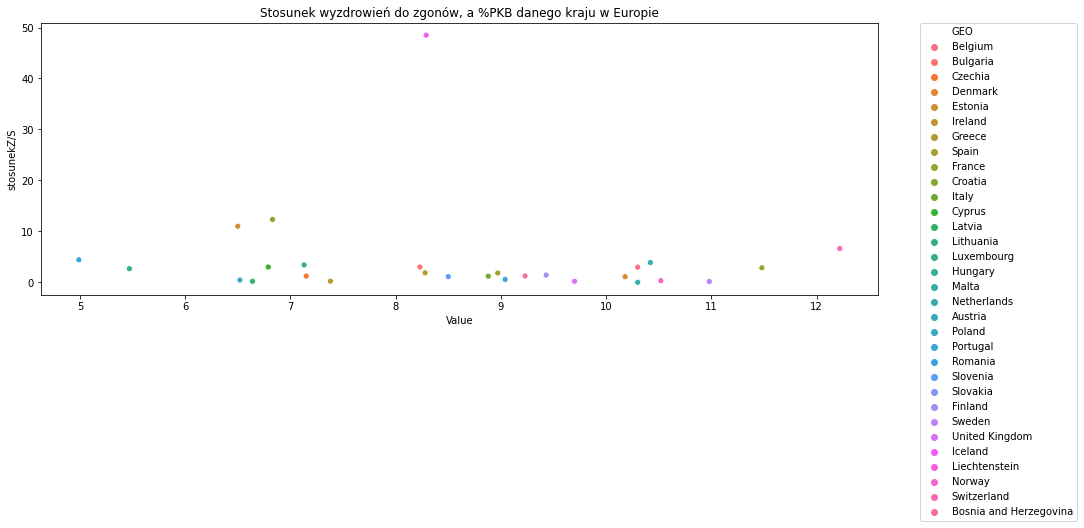

In [ ]:
sns.scatterplot(x= 'Value', y= 'stosunekZ/S', data=zadanie3, hue="GEO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Stosunek wyzdrowień do zgonów, a %PKB danego kraju w Europie')

Text(0.5, 1.0, 'Ilość zgonów, a %PKB danego kraju w Europie')

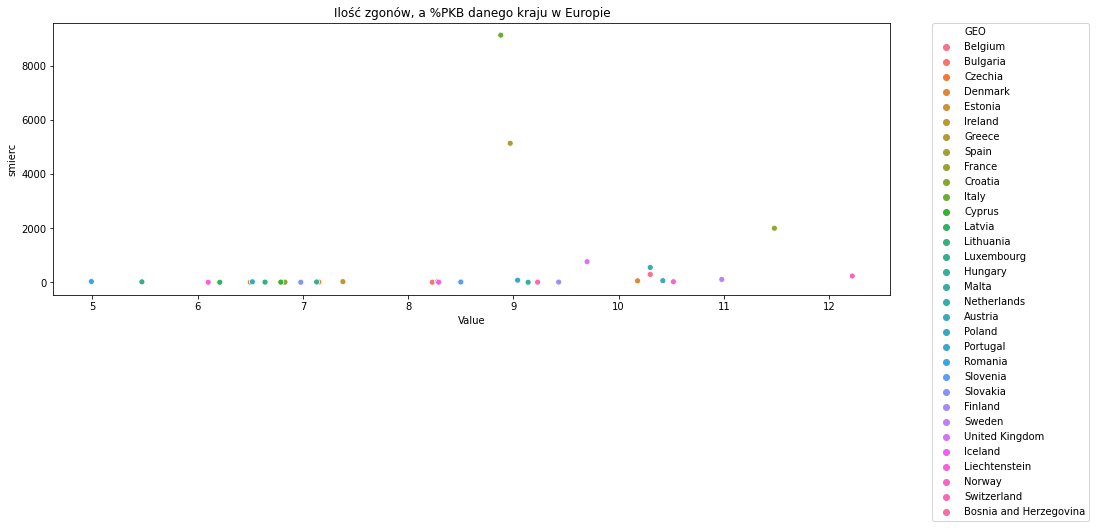

In [ ]:
sns.scatterplot(x= 'Value', y= 'smierc', data=zadanie3, hue="GEO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ilość zgonów, a %PKB danego kraju w Europie')

Text(0.5, 1.0, 'Ilość wyzdrowien, a %PKB danego kraju w Europie')

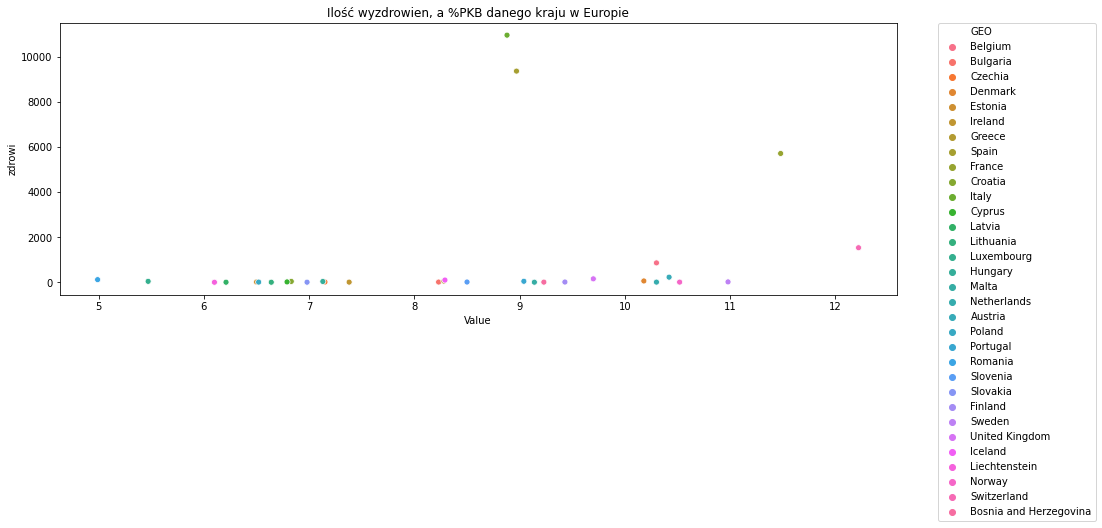

In [ ]:
sns.scatterplot(x= 'Value', y= 'zdrowi', data=zadanie3, hue="GEO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ilość wyzdrowien, a %PKB danego kraju w Europie')

**3. Liczba testów wykonanych w kajach Europy. Liczba testów, a liczba przypadków COVID-19. Liczba testów, a %PKB.**

In [ ]:
#chorzyZadanie5 - liczba przypadków koronawirusa w dniu 3/20/20
#testyEuropa - tabela łącząca %PKB z wykonanymi testami w danym kraju
#testyIChorzy - tabela łącząca poprzednią z tabela z liczbą przypadków kornonawirusa

In [ ]:
chorzyZadanie5= ConfirmedCases[['Country/Region', '3/20/20']].groupby(['Country/Region']).sum()

In [ ]:
testyEuropa= wartoscPKB.merge(testy, left_on="GEO", right_on="Entity")

In [ ]:
testyEuropa["Value"] = pd.to_numeric(zadanie2["Value"])

In [ ]:
testyIChorzy= testyEuropa.merge(chorzyZadanie5, left_on="GEO", right_on="Country/Region")

In [ ]:
testyIChorzy.sort_values(by='Total COVID-19 tests')

,TIME,GEO,UNIT,ICHA11_HF,Value,Flag and Footnotes,Entity,Code,Date,Total COVID-19 tests,3/20/20
11,2016,Malta,Percentage of gross domestic product (GDP),All financing schemes,6.79,NaN,Malta,MLT,"Mar 13, 2020",889,64
9,2016,Lithuania,Percentage of gross domestic product (GDP),All financing schemes,6.83,NaN,Lithuania,LTU,"Mar 20, 2020",1154,49
6,2016,Croatia,Percentage of gross domestic product (GDP),All financing schemes,8.28,NaN,Croatia,HRV,"Mar 19, 2020",1264,128
2,2016,Estonia,Percentage of gross domestic product (GDP),All financing schemes,7.15,NaN,Estonia,EST,"Mar 20, 2020",2504,283
17,2016,Slovakia,Percentage of gross domestic product (GDP),All financing schemes,10.30,NaN,Slovakia,SVK,"Mar 20, 2020",2707,137
18,2016,Finland,Percentage of gross domestic product (GDP),All financing schemes,10.42,NaN,Finland,FIN,"Mar 19, 2020",3000,450
10,2016,Hungary,Percentage of gross domestic product (GDP),All financing schemes,8.88,NaN,Hungary,HUN,"Mar 20, 2020",3007,85
8,2016,Latvia,Percentage of gross domestic product (GDP),All financing schemes,11.48,NaN,Latvia,LVA,"Mar 20, 2020",3205,111
23,2016,Switzerland,Percentage of gross domestic product (GDP),All financing schemes,6.98,NaN,Switzerland,CHE,"Mar 7, 2020",4000,5294
12,2016,Netherlands,Percentage of gross domestic product (GDP),All financing schemes,6.21,NaN,Netherlands,NLD,"Mar 7, 2020",6000,3003


Text(0.5, 1.0, 'Wykonane testy w krajach Europy')

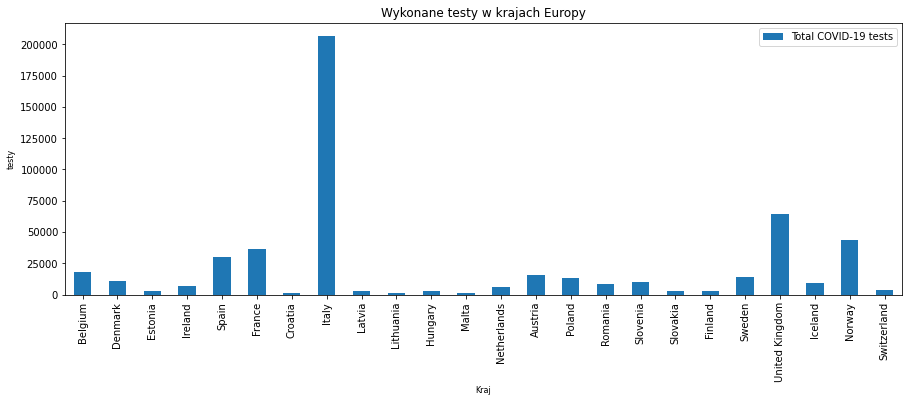

In [ ]:
ax = testyIChorzy.plot.bar(rot=90, x='GEO', y='Total COVID-19 tests',)
ax.set_xlabel("Kraj", fontsize=8,)
ax.set_ylabel("testy", fontsize=8)
ax.set_title('Wykonane testy w krajach Europy')

Text(0.5, 1.0, 'Ilość wykonanych testów, a ilość przypadków w krajach Europy')

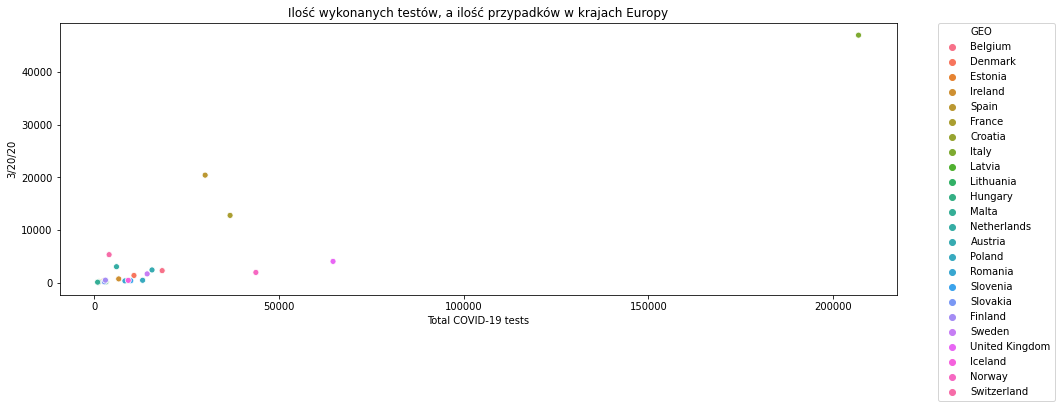

In [ ]:
sns.scatterplot(x= 'Total COVID-19 tests', y= '3/20/20', data=testyIChorzy, hue="GEO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ilość wykonanych testów, a ilość przypadków w krajach Europy')

Text(0.5, 1.0, 'Ilość wykonanych testów, a %PKB na służbę zdrowia w krajach Europy')

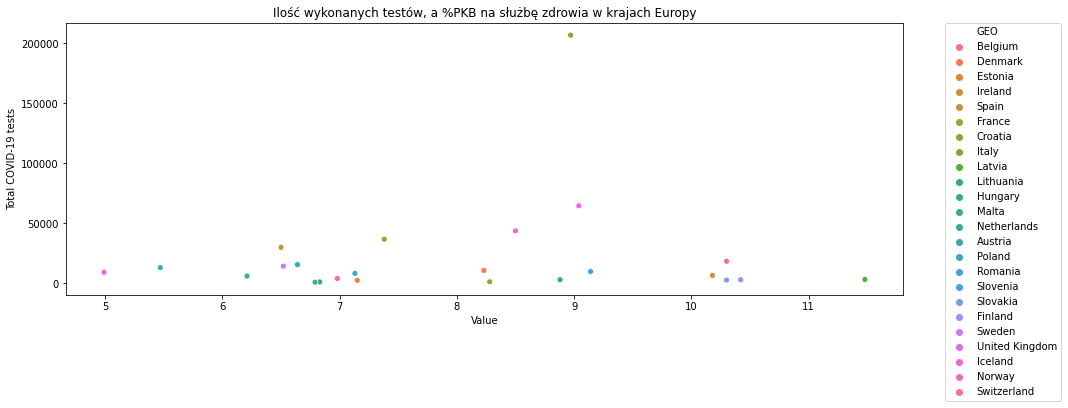

In [ ]:
sns.scatterplot(x= 'Value', y= 'Total COVID-19 tests', data=testyIChorzy, hue="GEO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ilość wykonanych testów, a %PKB na służbę zdrowia w krajach Europy')